<a href="https://colab.research.google.com/github/cyprian-kiplangat/AIClass/blob/main/cifar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task
Classify images from the CIFAR-10 dataset using a simple convolutional neural network model in TensorFlow and Keras.

## Load the dataset

### Subtask:
Load the CIFAR-10 dataset using TensorFlow and Keras.


In [5]:
from tensorflow.keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

print(f"x_train shape: {x_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"x_test shape: {x_test.shape}")
print(f"y_test shape: {y_test.shape}")

x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
x_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 1)


## Preprocess the data

### Subtask:
Normalize the pixel values of the images.


In [6]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255.0
x_test /= 255.0

print(f"x_train dtype: {x_train.dtype}")
print(f"x_test dtype: {x_test.dtype}")
print(f"x_train max value: {x_train.max()}")
print(f"x_test max value: {x_test.max()}")

x_train dtype: float32
x_test dtype: float32
x_train max value: 1.0
x_test max value: 1.0


## Build the model

### Subtask:
Create a simple convolutional neural network (CNN) model.


In [14]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential


# Define the number of classes
num_classes = 10

model = Sequential([
    Conv2D(128, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.5),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(num_classes, activation='softmax')
])

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 30, 30, 128)    │         3,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 15, 15, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 15, 15, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 13, 13, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 128)            │       589,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 742,410 (2.83 MB)

 Trainable params: 742,410 (2.83 MB)

 Non-trainable params: 0 (0.00 B)

## Compile the model

### Subtask:
Configure the model for training using an optimizer, loss function, and metrics.


In [15]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## Train the model

### Subtask:
Train the model using the training data.


In [16]:
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 8ms/step - accuracy: 0.3504 - loss: 1.7552 - val_accuracy: 0.5682 - val_loss: 1.2091
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.5597 - loss: 1.2378 - val_accuracy: 0.6314 - val_loss: 1.0613
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.6141 - loss: 1.0910 - val_accuracy: 0.6597 - val_loss: 0.9708
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.6486 - loss: 0.9934 - val_accuracy: 0.6870 - val_loss: 0.9073
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.6713 - loss: 0.9345 - val_accuracy: 0.6984 - val_loss: 0.8817
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.6889 - loss: 0.8818 - val_accuracy: 0.7108 - val_loss: 0.8517
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.7045 - loss: 0.8363 - val_accuracy: 0.7097 - val_loss: 0.8416
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.7150 - loss: 0.8097 

## Evaluate the model

In [17]:
loss, accuracy = model.evaluate(x_test, y_test, verbose=2)

print(f"Test loss: {loss}")
print(f"Test accuracy: {accuracy}")

313/313 - 1s - 3ms/step - accuracy: 0.7297 - loss: 0.7846
Test loss: 0.7845612168312073
Test accuracy: 0.7297000288963318


## Visualize Training History

### Subtask:
Plot the training and validation accuracy and loss over the epochs.

**Reasoning**:
Import `matplotlib.pyplot` and plot the accuracy and loss values from the `history` object.

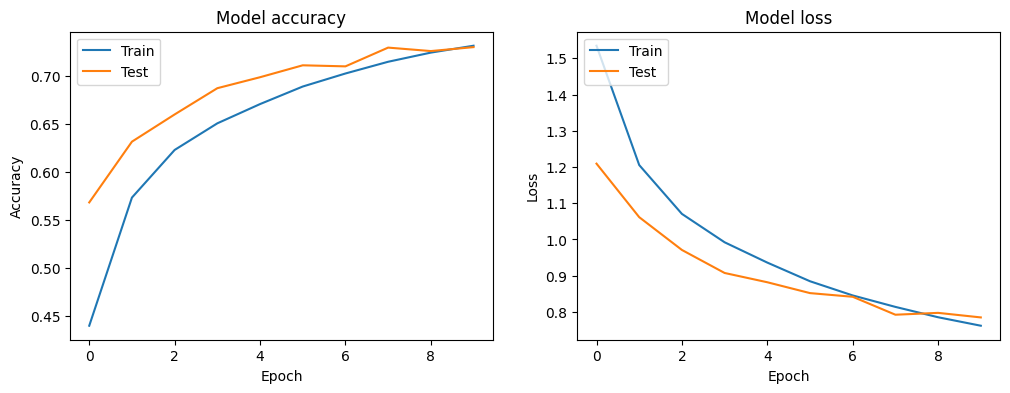

In [18]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.show()

## Make predictions

### Subtask:
Use the trained model to make predictions on new images.

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 566ms/step
Predicted classes: [8 2 5 2]
Actual classes: [8 2 5 0]


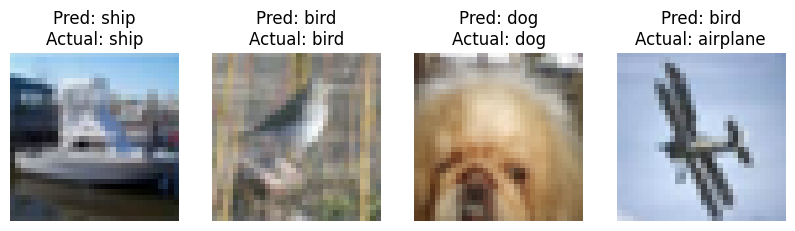

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# Define the class names for CIFAR-10
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# Choose random indices from the test set
num_images_to_show = 4
random_indices = np.random.choice(len(x_test), num_images_to_show, replace=False)

# Make predictions on the selected random test images
random_test_images = x_test[random_indices]
predictions = model.predict(random_test_images)
predicted_classes = np.argmax(predictions, axis=1)

# Get the actual classes for the selected random test images
actual_classes = y_test[random_indices].flatten()

print("Predicted classes:", predicted_classes)
print("Actual classes:", actual_classes)


# Display the random test images with their predicted and actual labels
plt.figure(figsize=(10, 10))
for i in range(num_images_to_show):
    plt.subplot(1, num_images_to_show, i + 1)
    plt.imshow(random_test_images[i])
    plt.title(f"Pred: {class_names[predicted_classes[i]]}\nActual: {class_names[actual_classes[i]]}")
    plt.axis('off')
plt.show()